In [2]:
#adam test branch

# imports
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, writers
from IPython import display
import cv2
from PIL import Image, ImageDraw
import time

In [15]:
 # Load image or draw below

Images = {"PIT":"pitt1.png","TREE":"tree.png", "CAT":"cat.jpg", "EXP":"exp.png"}

img = Image.open(Images["PIT"])

width, height = img.size
img = np.array(img)

img = img[:,:,1]/255



In [75]:
# Left click to draw circle
# Press escape when finished

width, height = 800, 800
circle_size =25

background_color_value = 1 # between 0 and 255
background_color_value = background_color_value % 255
circle_color = 255

# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img,(x,y),circle_size,circle_color, -1)

# Create a black image, a window and bind the function to window
img = np.ones((height,width,3), np.uint8)*background_color_value
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()


img = Image.fromarray(img)

width, height = img.size
img = np.array(img)

img = img[:,:,1]

print(img)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


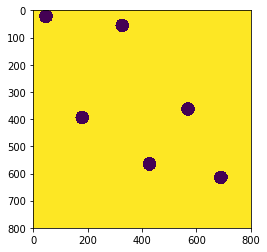

In [76]:
### - Initialize Array

plt.imshow(img)
plt.show()

M, N = img.shape

#random = np.random.random(size=(2, 3, row, col))
T = np.ones(shape=(2,3, M, N))
T[:,:,:,:] = T[0][0][:,:]*img

In [77]:
# rate constants
a, b, c = .7, 1, 1

t0 = 0
t = 1 # flip between t (0) and t+dt (1)
def timestep(T):
   
    global t0, t
    
    t0 = t
    t = (t + 1) % 2
    
    A0 = T[t0,0].copy()
    B0 = T[t0,1].copy()
    C0 = T[t0,2].copy()
    
    
    # perform jacobi iterations for each chemical
    for T0 in (A0,B0,C0):
        left = np.roll(T0, 1, axis=1)
        right = np.roll(T0, -1, axis=1)
        above = np.roll(T0, -1, axis=0)
        below = np.roll(T0, 1, axis=0)
        
        T0[1:-1, 1:-1] = 0.25*(left[1:-1, 1:-1] + right[1:-1, 1:-1] +
                          above[1:-1, 1:-1] + below[1:-1, 1:-1])

    
    # A0, B0, C0 have been jacobi averaged
    
    # reaction PDEs
    T[t,0] = A0 + A0*(a*B0 - c*C0) 
    T[t,1] = B0 + B0*(b*C0 - a*A0)
    T[t,2] = C0 + C0*(c*A0 - b*B0)

    
    # make sure concentrations are between 0 and 100%
    T[:,:][T<0] = 0
    T[:,:][T>1] = 1

    return T

 

In [78]:
frames = 400

# create figure
fig = plt.figure(figsize=(width/150, height/150))
#fig = plt.figure()
im = plt.imshow(T[0][0], cmap="jet", animated=True)
plt.axis("off")


start = time.time()

def animate(i, T):
    grid = timestep(T)
    im.set_array(T[i%2, 0]) # could also use T[i%2,1] or T[i%2,2]
    progress.progress += 1
    return im

# create progress bar
progress = display.ProgressBar(frames)
progress.display()

# create animation
anim = FuncAnimation(fig, animate, frames=frames, interval=40,
                             blit=False, fargs=(T,), repeat=False)
plt.close()

###### - This block displays in notebook
#
video = anim.to_html5_video()
stop = time.time()
print(stop-start)
display.HTML(video) # don't display if saving
#
######

###### - This block saves video
# 
#save_string = time.strftime("%Y%m%d-%H%M%S") + ".mp4"
#anim.save(save_string, fps=30, dpi=120, savefig_kwargs={'facecolor':'black'})
#print("saved as: ", save_string)
#stop = time.time()
#print(stop-start, "s")
#
######

[============================================================] 401/400

85.19702649116516
